In [261]:
from sklearn.metrics.pairwise import euclidean_distances
x1 = [[0,1],[1,1]]
x2 = [[1,1], [1,2]]

print(euclidean_distances(x1, x2))
print(euclidean_distances(x1, [[0,0]]))

[[1.         1.41421356]
 [0.         1.        ]]
[[1.        ]
 [1.41421356]]


In [262]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [263]:
iris = load_iris()
data = iris.data
features = iris.feature_names

iris_df = pd.DataFrame(data, columns=features)
iris_df['species'] = iris.target
# print(data[:10])
# print(features[:3])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [264]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [265]:
y = iris_df['species'].copy()
del iris_df['species']

In [266]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_df, y, test_size =0.2)

In [267]:
from sklearn.neighbors import KNeighborsClassifier

In [268]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score = classifier.score(x_test, y_test)
score2 = classifier.score(x_train, y_train)
print('test_score :', score)
print('train_score:', score2)

test_score : 0.9333333333333333
train_score: 0.975


In [269]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8  0  0]
 [ 0 12  2]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.86      0.92        14
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30



In [270]:
import pandas as pd

col_names  =['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi','dpf', 'age','outcome']

pima = pd.read_csv('data/diabetes.csv', header =0)

In [271]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [272]:
pima.rename({i:j for i, j in zip(pima.columns, col_names)}, axis =1, inplace = True)

In [273]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [274]:
positive = pima[pima['outcome']==1].copy()
negative = pima[pima['outcome']==0].copy()

In [275]:
# print(positive.count())
# print(negative.count())
print(positive.head())
print(negative.head())

   pregnant  glucose  bp  skin  insulin   bmi    dpf  age  outcome
0         6      148  72    35        0  33.6  0.627   50        1
2         8      183  64     0        0  23.3  0.672   32        1
4         0      137  40    35      168  43.1  2.288   33        1
6         3       78  50    32       88  31.0  0.248   26        1
8         2      197  70    45      543  30.5  0.158   53        1
    pregnant  glucose  bp  skin  insulin   bmi    dpf  age  outcome
1          1       85  66    29        0  26.6  0.351   31        0
3          1       89  66    23       94  28.1  0.167   21        0
5          5      116  74     0        0  25.6  0.201   30        0
7         10      115   0     0        0  35.3  0.134   29        0
10         4      110  92     0        0  37.6  0.191   30        0


In [276]:
print(positive.describe())
print(negative.describe())

         pregnant     glucose          bp        skin     insulin         bmi  \
count  268.000000  268.000000  268.000000  268.000000  268.000000  268.000000   
mean     4.865672  141.257463   70.824627   22.164179  100.335821   35.142537   
std      3.741239   31.939622   21.491812   17.679711  138.689125    7.262967   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.750000  119.000000   66.000000    0.000000    0.000000   30.800000   
50%      4.000000  140.000000   74.000000   27.000000    0.000000   34.250000   
75%      8.000000  167.000000   82.000000   36.000000  167.250000   38.775000   
max     17.000000  199.000000  114.000000   99.000000  846.000000   67.100000   

              dpf         age  outcome  
count  268.000000  268.000000    268.0  
mean     0.550500   37.067164      1.0  
std      0.372354   10.968254      0.0  
min      0.088000   21.000000      1.0  
25%      0.262500   28.000000      1.0  
50%      0.449000   36.0

In [277]:
import numpy as np
positive.iloc[:,:-1]=positive.replace(0, np.nan)
negative.iloc[:,:-1]=negative.replace(0, np.nan)
print(positive.isnull().sum())
print(negative.isnull().sum())


pregnant     38
glucose       2
bp           16
skin         88
insulin     138
bmi           2
dpf           0
age           0
outcome       0
dtype: int64
pregnant     73
glucose       3
bp           19
skin        139
insulin     236
bmi           9
dpf           0
age           0
outcome       0
dtype: int64


In [278]:
# 각 null 값들을 평균치로 적용
for index in positive.columns:
    positive[index].fillna(positive[index].mean(), inplace=True)

In [279]:
for index in negative.columns:
    negative[index].fillna(negative[index].mean(), inplace =True)

In [280]:
# 합치기 
pima = pd.concat([positive, negative], ignore_index=True)

In [281]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,dpf,age,outcome
0,6.000000,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,8.000000,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
2,5.669565,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
3,3.000000,78.0,50.0,32.0,88.000000,31.0,0.248,26,1
4,2.000000,197.0,70.0,45.0,543.000000,30.5,0.158,53,1


In [282]:
y = pima['outcome'].copy()
del pima['outcome']

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pima)

x_scaler = scaler.transform(pima)

In [305]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y , test_size =0.2)

In [306]:
import numpy as np

neighbor = np.arange(1,11,2) # knn에서는 neigbor 값이 홀수가 되도록 설정해서 구분이 되도록
train_accuracy = np.empty(len(neighbor)) # 매트릭스 8개 생성
test_accuracy = np.empty(len(neighbor))
print(train_accuracy)

[0.8  0.85 0.9  0.95 1.  ]


In [307]:
for i, j in enumerate(neighbor):
    #print(i, j)
    knn = KNeighborsClassifier(n_neighbors=j)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
    y_pred_proba = knn.predict_proba(x_test)[:,1]

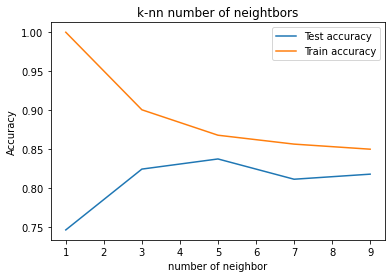

In [308]:
import matplotlib.pyplot as plt
plt.title('k-nn number of neightbors')
label =' test accuracy'
plt.plot(neighbor, test_accuracy, label = 'Test accuracy')
plt.plot(neighbor, train_accuracy, label = 'Train accuracy')
label = 'Train accuracy'
plt.legend()
plt.xlabel('number of neighbor')
plt.ylabel('Accuracy')
plt.show()

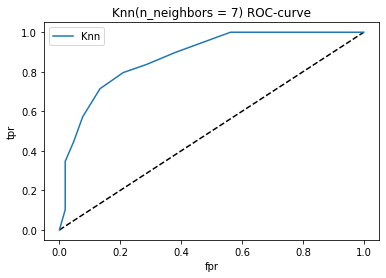

In [309]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholder = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors = 7) ROC-curve')
plt.legend()
plt.show()